# Multiple Linear Regression Analysis

In this notebook we are using the 'Greece - Agriculture and Rural Development' dataset to perform a multiple linear regression analysis.

## Import packages and classes

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [5]:
data_raw = pd.read_csv('../../../Datasets/Greece - Agriculture and Rural Development/agriculture-and-rural-development_grc.csv')
pd.set_option('display.max_columns', 4)
data_raw.head()

,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),...,Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,NaN,NaN,...,NaN,NaN
1,NaN,NaN,...,NaN,131960.0
2,NaN,NaN,...,NaN,131960.0
3,NaN,NaN,...,NaN,131960.0
4,NaN,NaN,...,NaN,131960.0


In [6]:
variable_x1 = "Crop production index (2014-2016 = 100)"
variable_x2 = "Fertilizer consumption (kilograms per hectare of arable land)"
variable_y = "Cereal production (metric tons)"

data = data_raw[[variable_x1, variable_x2, variable_y]].dropna().reset_index(drop=True)
data.head()

,Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Cereal production (metric tons)
0,62.570000,56.808876,2243876.0
1,50.700001,69.161718,2426843.0
2,57.430000,71.491986,2122537.0
3,57.150002,82.112629,2874641.0
4,61.770000,83.807422,2940922.0


In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(data[[variable_x1, variable_x2]], data[variable_y], test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46, 2)
(12, 2)
(46,)
(12,)


In [9]:
model = LinearRegression().fit(X_train, y_train)

In [10]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: -302754.05845782626
Slope: [40960.00468321  5869.58929994]


In [11]:
pred = model.predict(X_test)

In [12]:
model.score(X_train, y_train)

0.7928259553181847

C:\Users\Andre\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


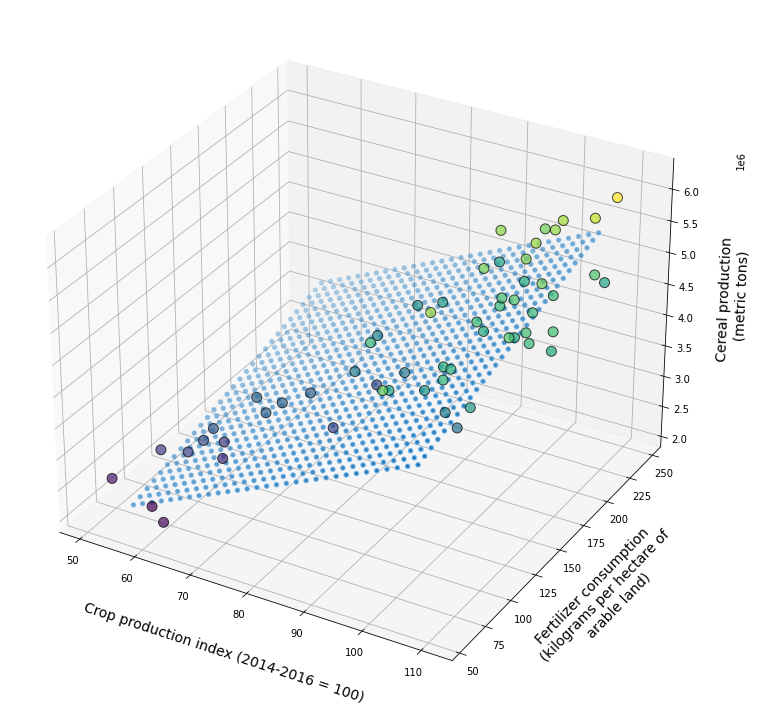

In [38]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[variable_x1], data[variable_x2], data[variable_y],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 100,
           c=data[variable_y])
plt.tight_layout()
xx_pred = np.linspace(np.min(X_test[variable_x1]), np.max(X_test[variable_x1]), 30)
yy_pred = np.linspace(np.min(X_test[variable_x2]), np.max(X_test[variable_x2]), 30)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = model.predict(model_viz)

ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='#70b3f0')
ax.set_xlabel('Crop production index (2014-2016 = 100)', fontsize=14, labelpad=20)
ax.set_ylabel('Fertilizer consumption \n (kilograms per hectare of \n arable land)', fontsize=14, labelpad=20)
ax.set_zlabel('Cereal production \n (metric tons)', fontsize=14, labelpad=20)
plt.subplots_adjust(bottom=0.15)
#plt.title("Least squares error - fit multiple linear regression")
plt.tight_layout()
plt.savefig('../plots/LSE_fit.png')


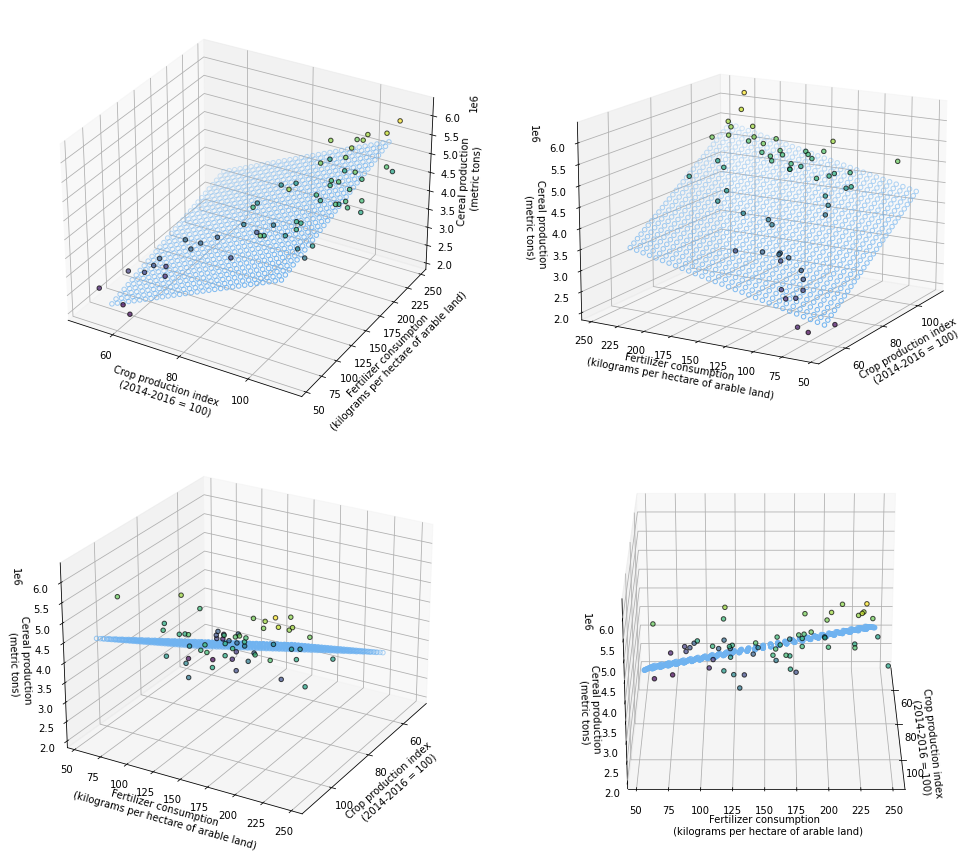

In [65]:
xx_pred = np.linspace(np.min(X_test[variable_x1]), np.max(X_test[variable_x1]), 30)
yy_pred = np.linspace(np.min(X_test[variable_x2]), np.max(X_test[variable_x2]), 30)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = model.predict(model_viz)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw=dict(projection='3d'), figsize=(16,12))
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    #ax.plot(data[variable_x1], data[variable_x2], data[variable_y], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(data[variable_x1], data[variable_x2], data[variable_y],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 20,
           c=data[variable_y])
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Crop production index \n (2014-2016 = 100)', fontsize=14)
    ax.set_ylabel('Fertilizer consumption \n (kilograms per hectare of arable land)', fontsize=14)
    ax.set_zlabel('Cereal production \n (metric tons)', fontsize=14)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.view_init(elev=25, azim=15)
ax2.view_init(elev=15, azim=-150)
ax3.view_init(elev=25, azim=30)
ax4.view_init(elev=25, azim=0)

fig.tight_layout()
#plt.savefig('../plots/.png')